In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
usecols_list = [
    "TP_SEXO",
    "TP_ZONA_RESIDENCIAL",
    "TP_ETAPA_ENSINO",
    "CO_UF",
    "CO_MUNICIPIO",
    "TP_DEPENDENCIA",
    "TP_COR_RACA"
    ]

df = pd.read_csv(
    "/home/thaty/cien_dadosthati/MATRICULA_NORDESTE.CSV", 
    dtype=str, 
    delimiter="|", 
    header=0,
    usecols=usecols_list,
)

In [3]:
df

,TP_SEXO,TP_COR_RACA,TP_ZONA_RESIDENCIAL,TP_ETAPA_ENSINO,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA
0,1,1,1,32,25,2516201,1
1,1,3,1,2,25,2504009,3
2,2,3,1,NaN,25,2507507,2
3,2,0,1,2,25,2503704,4
4,1,3,1,1,25,2503209,3
...,...,...,...,...,...,...,...
15304584,2,1,2,15,29,2925600,3
15304585,2,2,2,19,29,2917607,3
15304586,1,1,2,2,29,2923803,3
15304587,2,3,1,19,29,2921302,3


In [4]:
# remove nan entries
df_clean = df.dropna()

In [5]:
df_clean

,TP_SEXO,TP_COR_RACA,TP_ZONA_RESIDENCIAL,TP_ETAPA_ENSINO,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA
0,1,1,1,32,25,2516201,1
1,1,3,1,2,25,2504009,3
3,2,0,1,2,25,2503704,4
4,1,3,1,1,25,2503209,3
5,1,3,1,17,25,2503506,3
...,...,...,...,...,...,...,...
15304584,2,1,2,15,29,2925600,3
15304585,2,2,2,19,29,2917607,3
15304586,1,1,2,2,29,2923803,3
15304587,2,3,1,19,29,2921302,3


In [6]:
# Remove homens
df_mulher = df_clean[df_clean["TP_SEXO"] == '2'].drop(["TP_SEXO"], axis=1)

In [7]:
df_mulher

,TP_COR_RACA,TP_ZONA_RESIDENCIAL,TP_ETAPA_ENSINO,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA
3,0,1,2,25,2503704,4
6,0,1,1,25,2504009,4
9,3,1,18,25,2506806,4
10,3,2,16,25,2511608,3
13,0,1,18,25,2507507,4
...,...,...,...,...,...,...
15304583,3,2,25,29,2918803,2
15304584,1,2,15,29,2925600,3
15304585,2,2,19,29,2917607,3
15304587,3,1,19,29,2921302,3


In [8]:
# Pega apenas mulheres no ultimo ano do ensino medio
ultimo_ano_cats = ['27', '28', '32', '33', '37', '38']
#ultimo_ano_cats = ['27', '28', '37', '38']
df_ultimo_ano = df_mulher[df_mulher["TP_ETAPA_ENSINO"].isin(ultimo_ano_cats)].drop(['TP_ETAPA_ENSINO'], axis=1)

In [9]:
df_ultimo_ano

,TP_COR_RACA,TP_ZONA_RESIDENCIAL,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA
28,0,1,25,2514909,2
64,1,1,25,2510808,2
81,3,1,25,2506301,2
102,3,1,25,2507507,2
434,3,2,25,2511905,2
...,...,...,...,...,...
15304341,0,2,29,2932903,2
15304367,3,2,29,2910800,2
15304502,0,2,29,2912202,2
15304510,3,2,29,2927002,2


In [10]:
df_ultimo_ano_rn = df_ultimo_ano[df_ultimo_ano['CO_UF'] == '24'].drop(["CO_UF"], axis=1)

In [12]:
df_ultimo_ano_rn

,TP_COR_RACA,TP_ZONA_RESIDENCIAL,CO_MUNICIPIO,TP_DEPENDENCIA
6448835,0,2,2404408,2
6448883,3,1,2410405,2
6448903,1,1,2408003,2
6448939,1,1,2408102,2
6448940,3,1,2408102,2
...,...,...,...,...
7485738,1,2,2414159,2
7486028,3,1,2409506,2
7486055,3,1,2407104,2
7486086,2,1,2408102,2


In [13]:
nome_cidade_map = pd.read_csv(
    "/home/thaty/cien_dadosthati/dicionario_municipiosRN.csv", 
    dtype=str, 
    delimiter=",", 
    header=0,
)

In [14]:
nome_cidade_map

,Código do Município,Nome do Município
0,2400109,Acari
1,2400208,Açu
2,2400307,Afonso Bezerra
3,2400406,Água Nova
4,2400505,Alexandria
...,...,...
162,2414704,Várzea
163,2414753,Venha-Ver
164,2414803,Vera Cruz
165,2414902,Viçosa


In [15]:
codigo = list(nome_cidade_map['Código do Município'])
nome = list(nome_cidade_map['Nome do Município'])
codigo2nome = dict(zip(codigo, nome))

In [16]:
df_ultimo_ano_muncipios = df_ultimo_ano_rn.copy()
l1 = df_ultimo_ano_muncipios["CO_MUNICIPIO"].tolist()
names = []
for k in l1:
    names.append(codigo2nome[k])
df_ultimo_ano_muncipios["NOME_MUNICIPIO"] = names
df_ultimo_ano_muncipios = df_ultimo_ano_muncipios.drop(['CO_MUNICIPIO'], axis=1)

In [17]:
df_ultimo_ano_muncipios

,TP_COR_RACA,TP_ZONA_RESIDENCIAL,TP_DEPENDENCIA,NOME_MUNICIPIO
6448835,0,2,2,Grossos
6448883,3,1,2,Pureza
6448903,1,1,2,Mossoró
6448939,1,1,2,Natal
6448940,3,1,2,Natal
...,...,...,...,...
7485738,1,2,2,Tenente Laurentino Cruz
7486028,3,1,2,Pedra Grande
7486055,3,1,2,Macaíba
7486086,2,1,2,Natal


In [18]:
df_count = df_ultimo_ano_muncipios.groupby(["NOME_MUNICIPIO"]).size().reset_index(name="COUNT")

In [19]:
df_count

,NOME_MUNICIPIO,COUNT
0,Acari,25
1,Afonso Bezerra,38
2,Alexandria,40
3,Almino Afonso,12
4,Alto do Rodrigues,83
...,...,...
161,Vera Cruz,89
162,Vila Flor,16
163,Viçosa,4
164,Várzea,26


In [20]:
def estatica_para_cidades(df, nomes_cidades):
    aux_zona_residencial = {
        "1": 0,
        "2": 0
    }
    aux_dependencia = {
        "1": 0,
        "2": 0,
        "3": 0,
        "4": 0,
    }
    aux_cor_raca = {
        "0": 0,
        "1": 0,
        "2": 0,
        "3": 0,
        "4": 0,
        "5": 0,
    }
    output_dict = {}
    for nome_cidade in nomes_cidades:
        output_dict[nome_cidade] = {}
        df_aux = df[df["NOME_MUNICIPIO"] == nome_cidade]
        total = 0
        for key in aux_zona_residencial:
            output_dict[nome_cidade]['TP_ZONA_RESIDENCIAL_' +  key] = len(df_aux[df_aux.TP_ZONA_RESIDENCIAL == key])
            total += len(df_aux[df_aux.TP_ZONA_RESIDENCIAL == key])
        
        for key in aux_zona_residencial:
            output_dict[nome_cidade]['TP_ZONA_RESIDENCIAL_' +  key] /= total

                                 
        total = 0
        for key in aux_dependencia:
            output_dict[nome_cidade]['TP_DEPENDENCIA_' + key] = len(df_aux[df_aux.TP_DEPENDENCIA == key])
            total += len(df_aux[df_aux.TP_DEPENDENCIA == key])

        for key in aux_dependencia:
            output_dict[nome_cidade]['TP_DEPENDENCIA_' + key] /= total
        
        
        total = 0
        for key in aux_cor_raca:
            output_dict[nome_cidade]['TP_COR_RACA_' + key] = len(df_aux[df_aux.TP_COR_RACA == key])
            total += len(df_aux[df_aux.TP_COR_RACA == key])

        for key in aux_cor_raca:
            output_dict[nome_cidade]['TP_COR_RACA_' + key] /= total
        
            
    return output_dict

nomes_cidades = list(df_count["NOME_MUNICIPIO"])
municipio_est = estatica_para_cidades(df_ultimo_ano_muncipios, nomes_cidades)

In [21]:
municipio_est

{'Acari': {'TP_ZONA_RESIDENCIAL_1': 0.92,
  'TP_ZONA_RESIDENCIAL_2': 0.08,
  'TP_DEPENDENCIA_1': 0.0,
  'TP_DEPENDENCIA_2': 1.0,
  'TP_DEPENDENCIA_3': 0.0,
  'TP_DEPENDENCIA_4': 0.0,
  'TP_COR_RACA_0': 0.8,
  'TP_COR_RACA_1': 0.08,
  'TP_COR_RACA_2': 0.0,
  'TP_COR_RACA_3': 0.12,
  'TP_COR_RACA_4': 0.0,
  'TP_COR_RACA_5': 0.0},
 'Afonso Bezerra': {'TP_ZONA_RESIDENCIAL_1': 0.5263157894736842,
  'TP_ZONA_RESIDENCIAL_2': 0.47368421052631576,
  'TP_DEPENDENCIA_1': 0.0,
  'TP_DEPENDENCIA_2': 1.0,
  'TP_DEPENDENCIA_3': 0.0,
  'TP_DEPENDENCIA_4': 0.0,
  'TP_COR_RACA_0': 0.0,
  'TP_COR_RACA_1': 0.2894736842105263,
  'TP_COR_RACA_2': 0.02631578947368421,
  'TP_COR_RACA_3': 0.6842105263157895,
  'TP_COR_RACA_4': 0.0,
  'TP_COR_RACA_5': 0.0},
 'Alexandria': {'TP_ZONA_RESIDENCIAL_1': 0.675,
  'TP_ZONA_RESIDENCIAL_2': 0.325,
  'TP_DEPENDENCIA_1': 0.0,
  'TP_DEPENDENCIA_2': 1.0,
  'TP_DEPENDENCIA_3': 0.0,
  'TP_DEPENDENCIA_4': 0.0,
  'TP_COR_RACA_0': 0.575,
  'TP_COR_RACA_1': 0.175,
  'TP_COR_RACA_2

In [22]:
df_cidade_estatistica = pd.DataFrame(municipio_est).transpose()
df_cidade_estatistica["NOME_MUNICIPIO"] = list(df_count["NOME_MUNICIPIO"])
first_column = df_cidade_estatistica.pop('NOME_MUNICIPIO')
df_cidade_estatistica.insert(0, 'NOME_MUNICIPIO', first_column)

In [23]:
df_cidade_estatistica

,NOME_MUNICIPIO,TP_ZONA_RESIDENCIAL_1,TP_ZONA_RESIDENCIAL_2,TP_DEPENDENCIA_1,TP_DEPENDENCIA_2,TP_DEPENDENCIA_3,TP_DEPENDENCIA_4,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5
Acari,Acari,0.920000,0.080000,0.0,1.0,0.0,0.0,0.800000,0.080000,0.000000,0.120000,0.0,0.0
Afonso Bezerra,Afonso Bezerra,0.526316,0.473684,0.0,1.0,0.0,0.0,0.000000,0.289474,0.026316,0.684211,0.0,0.0
Alexandria,Alexandria,0.675000,0.325000,0.0,1.0,0.0,0.0,0.575000,0.175000,0.000000,0.250000,0.0,0.0
Almino Afonso,Almino Afonso,0.916667,0.083333,0.0,1.0,0.0,0.0,0.000000,0.750000,0.000000,0.250000,0.0,0.0
Alto do Rodrigues,Alto do Rodrigues,0.638554,0.361446,0.0,1.0,0.0,0.0,0.385542,0.180723,0.012048,0.421687,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vera Cruz,Vera Cruz,0.775281,0.224719,0.0,1.0,0.0,0.0,0.258427,0.213483,0.033708,0.494382,0.0,0.0
Vila Flor,Vila Flor,0.812500,0.187500,0.0,1.0,0.0,0.0,0.562500,0.250000,0.000000,0.187500,0.0,0.0
Viçosa,Viçosa,1.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.250000,0.000000,0.750000,0.0,0.0
Várzea,Várzea,0.884615,0.115385,0.0,1.0,0.0,0.0,0.153846,0.153846,0.000000,0.692308,0.0,0.0


In [24]:
df_all_info = pd.merge(df_count, df_cidade_estatistica, left_on='NOME_MUNICIPIO', right_on='NOME_MUNICIPIO')

In [25]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
df_all_info
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_columns', 20)

,NOME_MUNICIPIO,COUNT,TP_ZONA_RESIDENCIAL_1,TP_ZONA_RESIDENCIAL_2,TP_DEPENDENCIA_1,TP_DEPENDENCIA_2,TP_DEPENDENCIA_3,TP_DEPENDENCIA_4,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5
0,Acari,25,0.920000,0.080000,0.0,1.0,0.0,0.0,0.800000,0.080000,0.000000,0.120000,0.0,0.0
1,Afonso Bezerra,38,0.526316,0.473684,0.0,1.0,0.0,0.0,0.000000,0.289474,0.026316,0.684211,0.0,0.0
2,Alexandria,40,0.675000,0.325000,0.0,1.0,0.0,0.0,0.575000,0.175000,0.000000,0.250000,0.0,0.0
3,Almino Afonso,12,0.916667,0.083333,0.0,1.0,0.0,0.0,0.000000,0.750000,0.000000,0.250000,0.0,0.0
4,Alto do Rodrigues,83,0.638554,0.361446,0.0,1.0,0.0,0.0,0.385542,0.180723,0.012048,0.421687,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Vera Cruz,89,0.775281,0.224719,0.0,1.0,0.0,0.0,0.258427,0.213483,0.033708,0.494382,0.0,0.0
162,Vila Flor,16,0.812500,0.187500,0.0,1.0,0.0,0.0,0.562500,0.250000,0.000000,0.187500,0.0,0.0
163,Viçosa,4,1.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.250000,0.000000,0.750000,0.0,0.0
164,Várzea,26,0.884615,0.115385,0.0,1.0,0.0,0.0,0.153846,0.153846,0.000000,0.692308,0.0,0.0


In [26]:
df_all_info.to_csv("/home/thaty/cien_dadosthati/ApresentacaoFinal/data.csv")

## Analysis_1

In [27]:
columns1 = [
    "TP_ZONA_RESIDENCIAL_1", "TP_ZONA_RESIDENCIAL_2", 
    "TP_DEPENDENCIA_1", "TP_DEPENDENCIA_2", "TP_DEPENDENCIA_3", "TP_DEPENDENCIA_4"
]
df_zona_dep = df_all_info[columns1]

In [28]:
df_zona_dep

,TP_ZONA_RESIDENCIAL_1,TP_ZONA_RESIDENCIAL_2,TP_DEPENDENCIA_1,TP_DEPENDENCIA_2,TP_DEPENDENCIA_3,TP_DEPENDENCIA_4
0,0.920000,0.080000,0.0,1.0,0.0,0.0
1,0.526316,0.473684,0.0,1.0,0.0,0.0
2,0.675000,0.325000,0.0,1.0,0.0,0.0
3,0.916667,0.083333,0.0,1.0,0.0,0.0
4,0.638554,0.361446,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
161,0.775281,0.224719,0.0,1.0,0.0,0.0
162,0.812500,0.187500,0.0,1.0,0.0,0.0
163,1.000000,0.000000,0.0,1.0,0.0,0.0
164,0.884615,0.115385,0.0,1.0,0.0,0.0


In [29]:
np_zona_dep = df_zona_dep.to_numpy(dtype=np.float32)
print(np_zona_dep)

[[0.92       0.08       0.         1.         0.         0.        ]
 [0.5263158  0.47368422 0.         1.         0.         0.        ]
 [0.675      0.325      0.         1.         0.         0.        ]
 [0.9166667  0.08333334 0.         1.         0.         0.        ]
 [0.6385542  0.36144578 0.         1.         0.         0.        ]
 [0.9027778  0.09722222 0.         1.         0.         0.        ]
 [0.54545456 0.45454547 0.         1.         0.         0.        ]
 [0.8397436  0.16025642 0.49358973 0.5032051  0.         0.00320513]
 [0.7647059  0.23529412 0.         0.8352941  0.         0.16470589]
 [0.6617647  0.3382353  0.         1.         0.         0.        ]
 [0.9310345  0.06896552 0.         1.         0.         0.        ]
 [0.7653846  0.23461539 0.         0.6846154  0.         0.31538463]
 [0.64179105 0.35820895 0.         0.9328358  0.         0.06716418]
 [0.4347826  0.5652174  0.         1.         0.         0.        ]
 [0.81395346 0.18604651 0.        

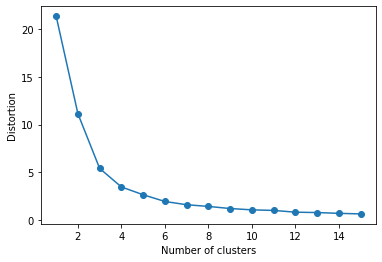

In [30]:
# calculate distortion for a range of number of cluster
distortions = []
N_C = 16
for i in range(1, N_C):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=20, max_iter=2000,
        tol=1e-04, random_state=0
    )
    km.fit(np_zona_dep)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, N_C), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [57]:
km_zona_dep = KMeans(
    n_clusters=4, init='random',
    n_init=20, max_iter=2000, 
    tol=1e-04, random_state=0
)

zona_dep_clusters = km_zona_dep.fit_predict(np_zona_dep)
zona_dep_clusters_list = list(zona_dep_clusters)

In [87]:
df_zona_dep2 = df_zona_dep.copy()
df_zona_dep2["CLUSTER"] = zona_dep_clusters_list
df_zona_dep2["NOME_MUNICIPIO"] = df_all_info[["NOME_MUNICIPIO"]].copy()

municipio_col = df_zona_dep2.pop('NOME_MUNICIPIO')
cluster_col = df_zona_dep2.pop('CLUSTER')

df_zona_dep2.insert(0, 'CLUSTER', cluster_col)
df_zona_dep2.insert(0, 'NOME_MUNICIPIO', municipio_col)
df_zona_dep2.insert(2, 'COUNT', df_all_info[["COUNT"]].copy())

In [83]:
df_zona_dep2

,NOME_MUNICIPIO,CLUSTER,COUNT,TP_ZONA_RESIDENCIAL_1,TP_ZONA_RESIDENCIAL_2,TP_DEPENDENCIA_1,TP_DEPENDENCIA_2,TP_DEPENDENCIA_3,TP_DEPENDENCIA_4
0,Acari,0,25,0.920000,0.080000,0.0,1.0,0.0,0.0
1,Afonso Bezerra,1,38,0.526316,0.473684,0.0,1.0,0.0,0.0
2,Alexandria,3,40,0.675000,0.325000,0.0,1.0,0.0,0.0
3,Almino Afonso,0,12,0.916667,0.083333,0.0,1.0,0.0,0.0
4,Alto do Rodrigues,3,83,0.638554,0.361446,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
161,Vera Cruz,3,89,0.775281,0.224719,0.0,1.0,0.0,0.0
162,Vila Flor,0,16,0.812500,0.187500,0.0,1.0,0.0,0.0
163,Viçosa,0,4,1.000000,0.000000,0.0,1.0,0.0,0.0
164,Várzea,0,26,0.884615,0.115385,0.0,1.0,0.0,0.0


In [88]:
df_zona_dep2 = df_zona_dep2.sort_values(["CLUSTER", "COUNT"], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [89]:
df_zona_dep2

,NOME_MUNICIPIO,CLUSTER,COUNT,TP_ZONA_RESIDENCIAL_1,TP_ZONA_RESIDENCIAL_2,TP_DEPENDENCIA_1,TP_DEPENDENCIA_2,TP_DEPENDENCIA_3,TP_DEPENDENCIA_4
163,Viçosa,0,4,1.000000,0.000000,0.000000,1.000000,0.0,0.000000
155,Timbaúba dos Batistas,0,5,0.800000,0.200000,0.000000,1.000000,0.0,0.000000
40,Francisco Dantas,0,6,0.833333,0.166667,0.000000,1.000000,0.0,0.000000
49,Ipueira,0,8,1.000000,0.000000,0.000000,1.000000,0.0,0.000000
3,Almino Afonso,0,12,0.916667,0.083333,0.000000,1.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
36,Extremoz,3,175,0.765714,0.234286,0.000000,0.948571,0.0,0.051429
43,Goianinha,3,188,0.558511,0.441489,0.000000,0.968085,0.0,0.031915
136,São José de Mipibu,3,234,0.705128,0.294872,0.000000,0.965812,0.0,0.034188
11,Açu,3,260,0.765385,0.234615,0.000000,0.684615,0.0,0.315385


In [90]:
df_zona_dep2.to_csv("/home/thaty/cien_dadosthati/ApresentacaoFinal/data_clusters1.csv")

In [63]:
print(df_zona_dep2["CLUSTER"].value_counts(normalize=False))
print("#"*10)
print(df_zona_dep2["CLUSTER"].value_counts(normalize=True))

3    59
0    49
1    42
2    16
Name: CLUSTER, dtype: int64
##########
3    0.355422
0    0.295181
1    0.253012
2    0.096386
Name: CLUSTER, dtype: float64


In [64]:
df_preview_analysis1 = df_zona_dep2.copy().drop(["NOME_MUNICIPIO"], axis=1)
df_analysis1 = df_preview_analysis1.groupby(["CLUSTER"]).agg(["mean", "std", "max", "min"])

In [65]:
df_preview_analysis1

,CLUSTER,TP_ZONA_RESIDENCIAL_1,TP_ZONA_RESIDENCIAL_2,TP_DEPENDENCIA_1,TP_DEPENDENCIA_2,TP_DEPENDENCIA_3,TP_DEPENDENCIA_4
0,0,0.920000,0.080000,0.0,1.0,0.0,0.0
120,0,0.833333,0.166667,0.0,1.0,0.0,0.0
116,0,0.900000,0.100000,0.0,1.0,0.0,0.0
35,0,0.965517,0.034483,0.0,1.0,0.0,0.0
115,0,0.944444,0.055556,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
88,3,0.600000,0.400000,0.0,1.0,0.0,0.0
59,3,0.593023,0.406977,0.0,1.0,0.0,0.0
52,3,0.631579,0.368421,0.0,1.0,0.0,0.0
21,3,0.583333,0.416667,0.0,1.0,0.0,0.0


In [66]:
df_analysis1

TP_ZONA_RESIDENCIAL_1                                \
                         mean       std       max       min   
CLUSTER                                                       
0                    0.903317  0.065873  1.000000  0.800000   
1                    0.417224  0.097649  0.547368  0.204545   
2                    0.856463  0.097641  0.991051  0.639344   
3                    0.681076  0.069758  0.781250  0.552239   

        TP_ZONA_RESIDENCIAL_2                               TP_DEPENDENCIA_1  \
                         mean       std       max       min             mean   
CLUSTER                                                                        
0                    0.096683  0.065873  0.200000  0.000000         0.001464   
1                    0.582776  0.097649  0.795455  0.452632         0.004612   
2                    0.143537  0.097641  0.360656  0.008949         0.426094   
3                    0.318924  0.069758  0.447761  0.218750         0.002661   

                   ... TP_DEPENDENCIA_2           TP_DEPENDENCIA_3            \
              std  ...              max       min             mean  std  max   
CLUSTER            ...                                                         
0        0.010251  ...         1.000000  0.680711              0.0  0.0  0.0   
1        0.029891  ...         1.000000  0.790576              0.0  0.0  0.0   
2        0.161368  ...         0.749104  0.333333              0.0  0.0  0.0   
3        0.020443  ...         1.000000  0.684615              0.0  0.0  0.0   

             TP_DEPENDENCIA_4                           
         min             mean       std       max  min  
CLUSTER                                                 
0        0.0         0.005052  0.035362  0.247531  0.0  
1        0.0         0.000374  0.002424  0.015707  0.0  
2        0.0         0.086028  0.082482  0.271042  0.0  
3        0.0         0.020406  0.059023  0.315385  0.0  

[4 rows x 24 columns]

<AxesSubplot:title={'center':'TP_DEPENDENCIA_4'}, xlabel='CLUSTER'>

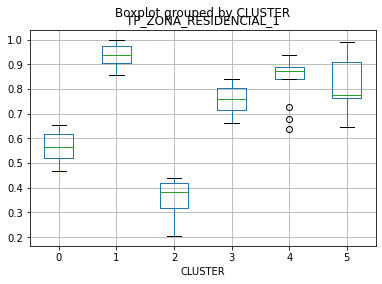

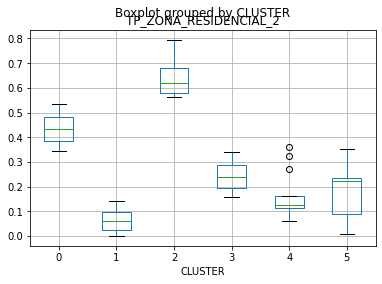

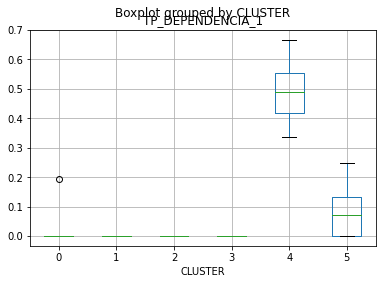

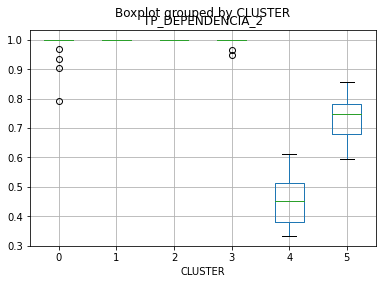

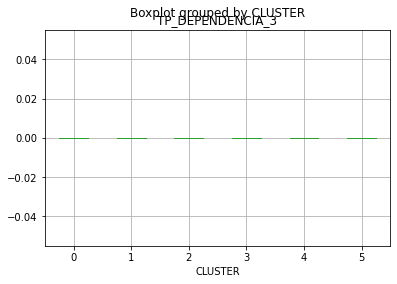

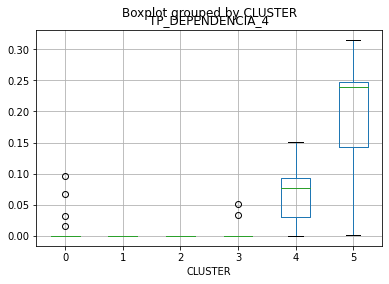

In [44]:
df_preview_analysis1.boxplot(column=['TP_ZONA_RESIDENCIAL_1'], by="CLUSTER")
df_preview_analysis1.boxplot(column=['TP_ZONA_RESIDENCIAL_2'], by="CLUSTER")
df_preview_analysis1.boxplot(column=['TP_DEPENDENCIA_1'], by="CLUSTER")
df_preview_analysis1.boxplot(column=['TP_DEPENDENCIA_2'], by="CLUSTER")
df_preview_analysis1.boxplot(column=['TP_DEPENDENCIA_3'], by="CLUSTER")
df_preview_analysis1.boxplot(column=['TP_DEPENDENCIA_4'], by="CLUSTER")

## Analysis_2

In [67]:
columns2 = [
    "TP_ZONA_RESIDENCIAL_1", "TP_ZONA_RESIDENCIAL_2", 
    "TP_DEPENDENCIA_1", "TP_DEPENDENCIA_2", "TP_DEPENDENCIA_3", "TP_DEPENDENCIA_4",
    "TP_COR_RACA_0", "TP_COR_RACA_1", "TP_COR_RACA_2", "TP_COR_RACA_3", "TP_COR_RACA_4", "TP_COR_RACA_5"
]
df_zona_dep_cor = df_all_info[columns2]

In [68]:
df_zona_dep_cor

,TP_ZONA_RESIDENCIAL_1,TP_ZONA_RESIDENCIAL_2,TP_DEPENDENCIA_1,TP_DEPENDENCIA_2,TP_DEPENDENCIA_3,TP_DEPENDENCIA_4,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5
0,0.920000,0.080000,0.0,1.0,0.0,0.0,0.800000,0.080000,0.000000,0.120000,0.0,0.0
1,0.526316,0.473684,0.0,1.0,0.0,0.0,0.000000,0.289474,0.026316,0.684211,0.0,0.0
2,0.675000,0.325000,0.0,1.0,0.0,0.0,0.575000,0.175000,0.000000,0.250000,0.0,0.0
3,0.916667,0.083333,0.0,1.0,0.0,0.0,0.000000,0.750000,0.000000,0.250000,0.0,0.0
4,0.638554,0.361446,0.0,1.0,0.0,0.0,0.385542,0.180723,0.012048,0.421687,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.775281,0.224719,0.0,1.0,0.0,0.0,0.258427,0.213483,0.033708,0.494382,0.0,0.0
162,0.812500,0.187500,0.0,1.0,0.0,0.0,0.562500,0.250000,0.000000,0.187500,0.0,0.0
163,1.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.250000,0.000000,0.750000,0.0,0.0
164,0.884615,0.115385,0.0,1.0,0.0,0.0,0.153846,0.153846,0.000000,0.692308,0.0,0.0


In [69]:
np_zona_dep_cor = df_zona_dep_cor.to_numpy(dtype=np.float32)
print(np_zona_dep_cor)

[[0.92       0.08       0.         ... 0.12       0.         0.        ]
 [0.5263158  0.47368422 0.         ... 0.68421054 0.         0.        ]
 [0.675      0.325      0.         ... 0.25       0.         0.        ]
 ...
 [1.         0.         0.         ... 0.75       0.         0.        ]
 [0.88461536 0.11538462 0.         ... 0.6923077  0.         0.        ]
 [0.7096774  0.29032257 0.         ... 0.09677419 0.         0.        ]]


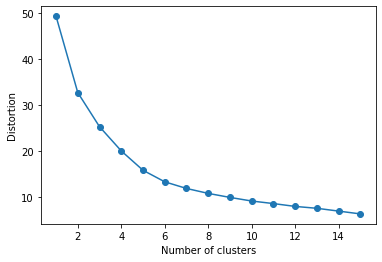

In [70]:
# calculate distortion for a range of number of cluster
distortions = []
N_C = 16
for i in range(1, N_C):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=20, max_iter=2000,
        tol=1e-04, random_state=0
    )
    km.fit(np_zona_dep_cor)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, N_C), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [71]:
km_zona_dep_cor = KMeans(
    n_clusters=6, init='random',
    n_init=20, max_iter=2000, 
    tol=1e-04, random_state=0
)

zona_dep_cor_clusters = km_zona_dep_cor.fit_predict(np_zona_dep_cor)
zona_dep_cor_clusters_list = list(zona_dep_cor_clusters)

In [91]:
df_zona_dep_cor2 = df_zona_dep_cor.copy()
df_zona_dep_cor2["CLUSTER"] = zona_dep_cor_clusters_list
df_zona_dep_cor2["NOME_MUNICIPIO"] = df_all_info[["NOME_MUNICIPIO"]].copy()

municipio_col = df_zona_dep_cor2.pop('NOME_MUNICIPIO')
cluster_col = df_zona_dep_cor2.pop('CLUSTER')

df_zona_dep_cor2.insert(0, 'CLUSTER', cluster_col)
df_zona_dep_cor2.insert(0, 'NOME_MUNICIPIO', municipio_col)
df_zona_dep_cor2.insert(2, 'COUNT', df_all_info[["COUNT"]].copy())

In [73]:
df_zona_dep_cor2

,NOME_MUNICIPIO,CLUSTER,TP_ZONA_RESIDENCIAL_1,TP_ZONA_RESIDENCIAL_2,TP_DEPENDENCIA_1,TP_DEPENDENCIA_2,TP_DEPENDENCIA_3,TP_DEPENDENCIA_4,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5
0,Acari,0,0.920000,0.080000,0.0,1.0,0.0,0.0,0.800000,0.080000,0.000000,0.120000,0.0,0.0
1,Afonso Bezerra,5,0.526316,0.473684,0.0,1.0,0.0,0.0,0.000000,0.289474,0.026316,0.684211,0.0,0.0
2,Alexandria,0,0.675000,0.325000,0.0,1.0,0.0,0.0,0.575000,0.175000,0.000000,0.250000,0.0,0.0
3,Almino Afonso,4,0.916667,0.083333,0.0,1.0,0.0,0.0,0.000000,0.750000,0.000000,0.250000,0.0,0.0
4,Alto do Rodrigues,0,0.638554,0.361446,0.0,1.0,0.0,0.0,0.385542,0.180723,0.012048,0.421687,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Vera Cruz,1,0.775281,0.224719,0.0,1.0,0.0,0.0,0.258427,0.213483,0.033708,0.494382,0.0,0.0
162,Vila Flor,0,0.812500,0.187500,0.0,1.0,0.0,0.0,0.562500,0.250000,0.000000,0.187500,0.0,0.0
163,Viçosa,1,1.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.250000,0.000000,0.750000,0.0,0.0
164,Várzea,1,0.884615,0.115385,0.0,1.0,0.0,0.0,0.153846,0.153846,0.000000,0.692308,0.0,0.0


In [92]:
df_zona_dep_cor2 = df_zona_dep_cor2.sort_values(["CLUSTER", "COUNT"], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [93]:
df_zona_dep_cor2

,NOME_MUNICIPIO,CLUSTER,COUNT,TP_ZONA_RESIDENCIAL_1,TP_ZONA_RESIDENCIAL_2,TP_DEPENDENCIA_1,TP_DEPENDENCIA_2,TP_DEPENDENCIA_3,TP_DEPENDENCIA_4,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5
155,Timbaúba dos Batistas,0,5,0.800000,0.200000,0.000000,1.000000,0.0,0.000000,0.800000,0.200000,0.000000,0.000000,0.000000,0.00000
69,Lagoa de Velhos,0,7,0.714286,0.285714,0.000000,1.000000,0.0,0.000000,0.428571,0.142857,0.000000,0.428571,0.000000,0.00000
104,Pilões,0,13,0.769231,0.230769,0.000000,1.000000,0.0,0.000000,0.769231,0.153846,0.000000,0.076923,0.000000,0.00000
38,Fernando Pedroza,0,14,0.857143,0.142857,0.000000,1.000000,0.0,0.000000,0.571429,0.071429,0.000000,0.357143,0.000000,0.00000
162,Vila Flor,0,16,0.812500,0.187500,0.000000,1.000000,0.0,0.000000,0.562500,0.250000,0.000000,0.187500,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Doutor Severiano,5,53,0.396226,0.603774,0.000000,1.000000,0.0,0.000000,0.169811,0.452830,0.075472,0.301887,0.000000,0.00000
46,Guamaré,5,74,0.418919,0.581081,0.000000,1.000000,0.0,0.000000,0.175676,0.162162,0.027027,0.635135,0.000000,0.00000
65,Lagoa Nova,5,92,0.510870,0.489130,0.000000,1.000000,0.0,0.000000,0.369565,0.141304,0.010870,0.478261,0.000000,0.00000
23,Caraúbas,5,95,0.547368,0.452632,0.000000,1.000000,0.0,0.000000,0.094737,0.315789,0.000000,0.589474,0.000000,0.00000


In [94]:
df_zona_dep_cor2.to_csv("/home/thaty/cien_dadosthati/ApresentacaoFinal/data_clusters2.csv")

In [76]:
print(df_zona_dep_cor2["CLUSTER"].value_counts(normalize=False))
print("#"*10)
print(df_zona_dep_cor2["CLUSTER"].value_counts(normalize=True))

1    40
0    32
2    31
4    24
5    22
3    17
Name: CLUSTER, dtype: int64
##########
1    0.240964
0    0.192771
2    0.186747
4    0.144578
5    0.132530
3    0.102410
Name: CLUSTER, dtype: float64


In [77]:
df_preview_analysis2 = df_zona_dep_cor2.copy().drop(["NOME_MUNICIPIO"], axis=1)
df_analysis2 = df_preview_analysis2.groupby(["CLUSTER"]).agg(["mean", "std", "max", "min"])

In [78]:
df_preview_analysis2

,CLUSTER,TP_ZONA_RESIDENCIAL_1,TP_ZONA_RESIDENCIAL_2,TP_DEPENDENCIA_1,TP_DEPENDENCIA_2,TP_DEPENDENCIA_3,TP_DEPENDENCIA_4,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5
0,0,0.920000,0.080000,0.0,1.000000,0.0,0.000000,0.800000,0.080000,0.000000,0.120000,0.0,0.0
45,0,0.661017,0.338983,0.0,1.000000,0.0,0.000000,0.559322,0.084746,0.016949,0.338983,0.0,0.0
55,0,0.741935,0.258065,0.0,1.000000,0.0,0.000000,0.806452,0.129032,0.000000,0.064516,0.0,0.0
57,0,0.775510,0.224490,0.0,0.857143,0.0,0.142857,0.408163,0.346939,0.000000,0.244898,0.0,0.0
66,0,0.925000,0.075000,0.0,1.000000,0.0,0.000000,0.950000,0.000000,0.025000,0.025000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,5,0.285714,0.714286,0.0,1.000000,0.0,0.000000,0.000000,0.142857,0.000000,0.857143,0.0,0.0
23,5,0.547368,0.452632,0.0,1.000000,0.0,0.000000,0.094737,0.315789,0.000000,0.589474,0.0,0.0
130,5,0.400000,0.600000,0.0,1.000000,0.0,0.000000,0.000000,0.520000,0.000000,0.480000,0.0,0.0
106,5,0.521739,0.478261,0.0,1.000000,0.0,0.000000,0.347826,0.086957,0.000000,0.565217,0.0,0.0


In [79]:
df_analysis2

TP_ZONA_RESIDENCIAL_1                                \
                         mean       std       max       min   
CLUSTER                                                       
0                    0.771886  0.097582  1.000000  0.621622   
1                    0.831354  0.118528  1.000000  0.631579   
2                    0.485849  0.121243  0.628571  0.208955   
3                    0.859679  0.095466  0.991051  0.639344   
4                    0.789084  0.148560  1.000000  0.500000   
5                    0.413839  0.092858  0.547368  0.204545   

        TP_ZONA_RESIDENCIAL_2                               TP_DEPENDENCIA_1  \
                         mean       std       max       min             mean   
CLUSTER                                                                        
0                    0.228114  0.097582  0.378378  0.000000         0.000000   
1                    0.168646  0.118528  0.368421  0.000000         0.003926   
2                    0.514151  0.121243  0.791045  0.371429         0.000000   
3                    0.140321  0.095466  0.360656  0.008949         0.405251   
4                    0.210916  0.148560  0.500000  0.000000         0.000000   
5                    0.586161  0.092858  0.795455  0.452632         0.008805   

                   ... TP_COR_RACA_3           TP_COR_RACA_4            \
              std  ...           max       min          mean       std   
CLUSTER            ...                                                   
0        0.000000  ...      0.428571  0.000000      0.001182  0.004901   
1        0.024828  ...      0.906977  0.434783      0.004812  0.009805   
2        0.000000  ...      0.400000  0.058824      0.000424  0.002363   
3        0.178319  ...      0.634615  0.246753      0.004004  0.005121   
4        0.000000  ...      0.414634  0.000000      0.000000  0.000000   
5        0.041301  ...      0.857143  0.301887      0.002307  0.007472   

                       TP_COR_RACA_5                           
              max  min          mean       std       max  min  
CLUSTER                                                        
0        0.025000  0.0      0.000134  0.000755  0.004274  0.0  
1        0.040000  0.0      0.000275  0.001742  0.011019  0.0  
2        0.013158  0.0      0.001267  0.004935  0.021739  0.0  
3        0.015319  0.0      0.002777  0.004055  0.014493  0.0  
4        0.000000  0.0      0.000000  0.000000  0.000000  0.0  
5        0.026316  0.0      0.000159  0.000744  0.003490  0.0  

[6 rows x 48 columns]

<AxesSubplot:title={'center':'TP_COR_RACA_5'}, xlabel='CLUSTER'>

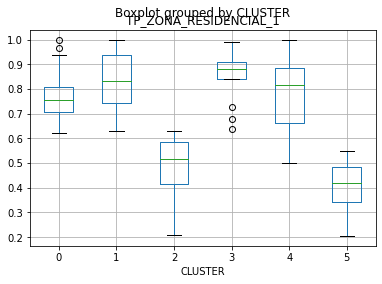

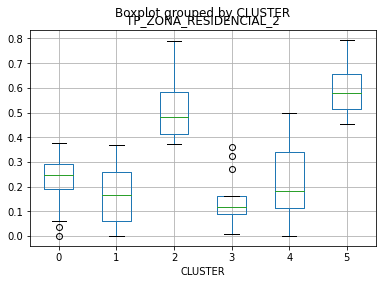

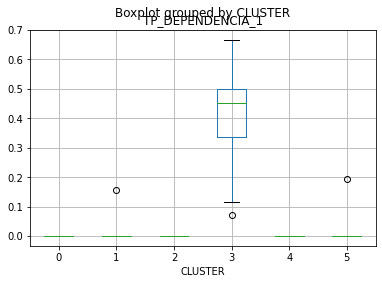

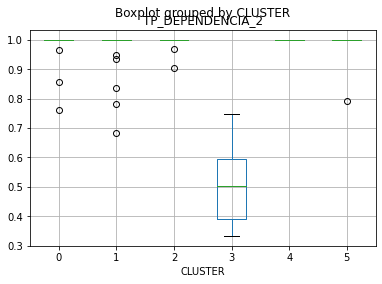

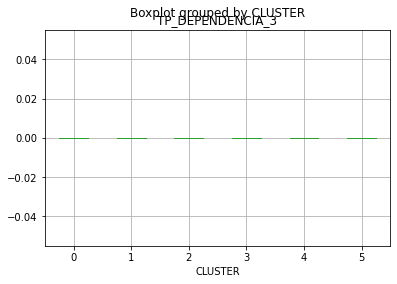

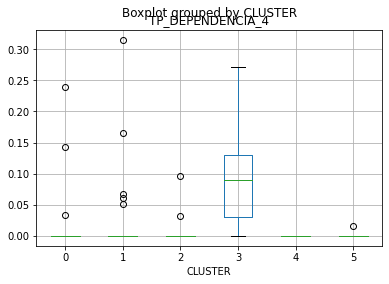

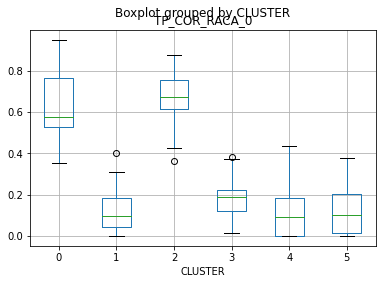

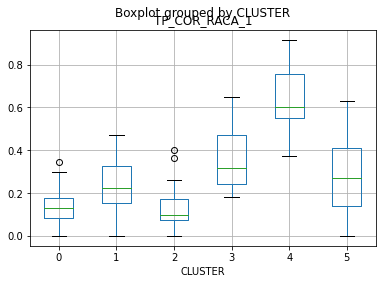

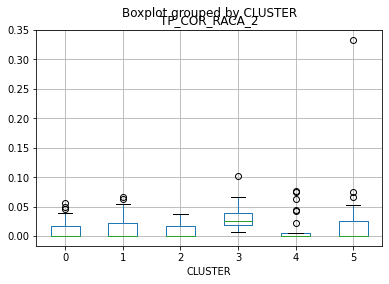

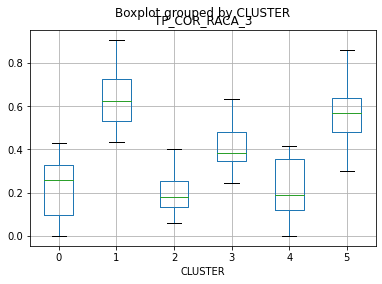

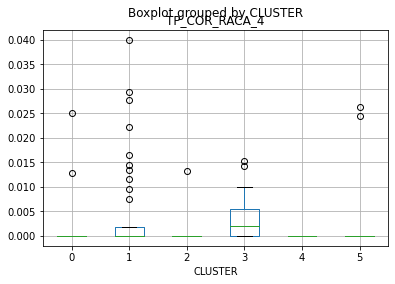

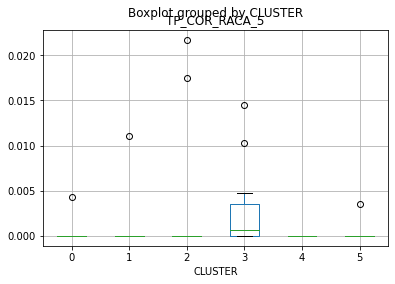

In [80]:
df_preview_analysis2.boxplot(column=['TP_ZONA_RESIDENCIAL_1'], by="CLUSTER")
df_preview_analysis2.boxplot(column=['TP_ZONA_RESIDENCIAL_2'], by="CLUSTER")
df_preview_analysis2.boxplot(column=['TP_DEPENDENCIA_1'], by="CLUSTER")
df_preview_analysis2.boxplot(column=['TP_DEPENDENCIA_2'], by="CLUSTER")
df_preview_analysis2.boxplot(column=['TP_DEPENDENCIA_3'], by="CLUSTER")
df_preview_analysis2.boxplot(column=['TP_DEPENDENCIA_4'], by="CLUSTER")
df_preview_analysis2.boxplot(column=['TP_COR_RACA_0'], by="CLUSTER")
df_preview_analysis2.boxplot(column=['TP_COR_RACA_1'], by="CLUSTER")
df_preview_analysis2.boxplot(column=['TP_COR_RACA_2'], by="CLUSTER")
df_preview_analysis2.boxplot(column=['TP_COR_RACA_3'], by="CLUSTER")
df_preview_analysis2.boxplot(column=['TP_COR_RACA_4'], by="CLUSTER")
df_preview_analysis2.boxplot(column=['TP_COR_RACA_5'], by="CLUSTER")